In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

#### Preprocess

In [179]:
df = pd.read_pickle('../data/sml.pkl')

In [283]:
#  target_series = temperature_habitacion_sensor

y = df.iloc[:,:1]

In [284]:
plt.rcParams['figure.figsize'] = (20,5)

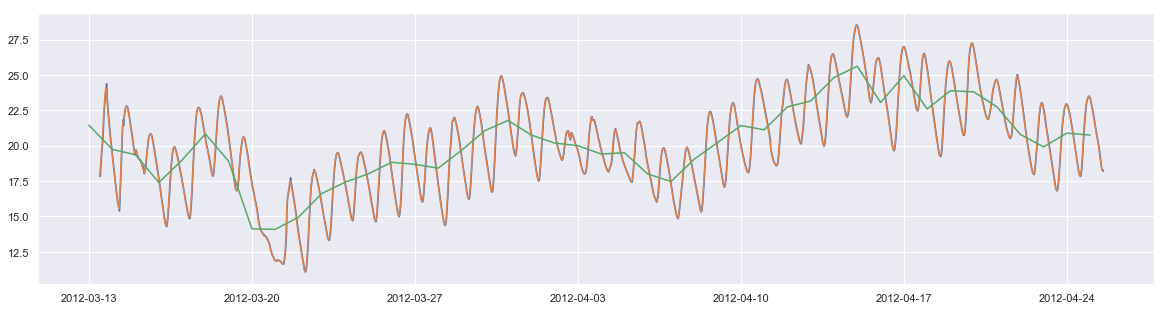

In [285]:
plt.plot(y)
plt.plot(y.resample('1h').mean())
plt.plot(y.resample('24h').mean())

In [286]:
y = y.resample('1h').mean()

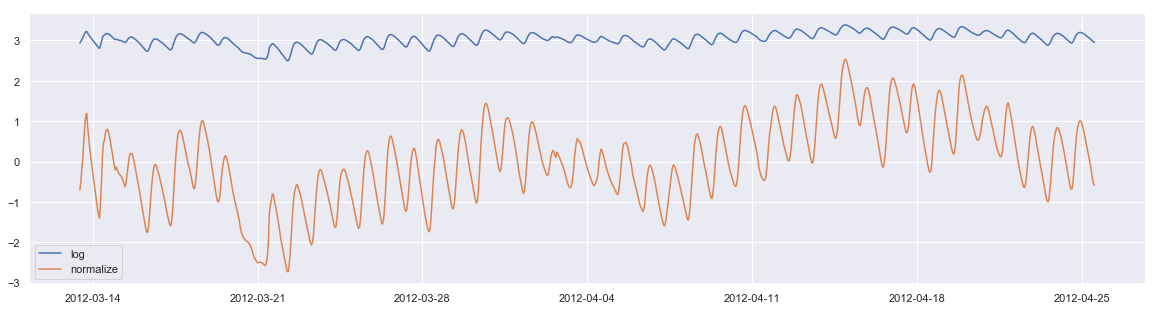

In [294]:
plt.plot(np.log1p(y))
plt.plot((y - y.mean())/y.std())
plt.legend(['log', 'normalize'])

In [303]:
# https://www.kaggle.com/tigurius/recuplots-and-cnns-for-time-series-classification
def recurrence_plot(s, eps=0.1, steps=10, metric='euclidean'):
    d = pdist(s, metric=metric)
    d = np.floor(d / eps)
    d[d > steps] = steps
    Z = squareform(d)
    return Z

In [304]:
from scipy.spatial.distance import (pdist, squareform)

In [331]:
## lets' pick a random batch of size 24h

In [335]:
y.index[-1]

Timestamp('2012-04-25 13:00:00', freq='H')

In [351]:
day=np.random.choice(np.unique(y.index.dayofyear.values))

In [356]:
b = y[y.index.dayofyear.isin((day,))]
b

,temperature_habitacion_sensor
2012-03-23 00:00:00,15.761175
2012-03-23 01:00:00,15.342650
2012-03-23 02:00:00,14.952800
2012-03-23 03:00:00,14.593150
2012-03-23 04:00:00,14.216150
2012-03-23 05:00:00,13.825175
2012-03-23 06:00:00,13.481000
2012-03-23 07:00:00,13.310500
2012-03-23 08:00:00,13.494350
2012-03-23 09:00:00,14.131150


In [ ]:
b = (b - b.mean())/b.std()

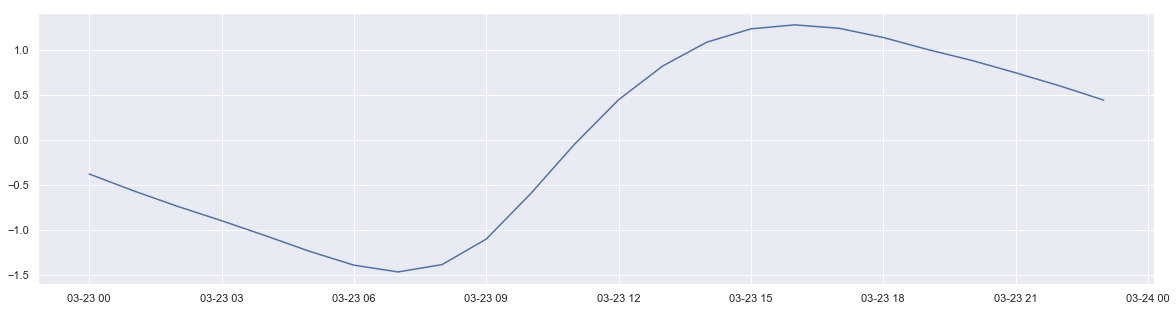

In [406]:
plt.plot(b)

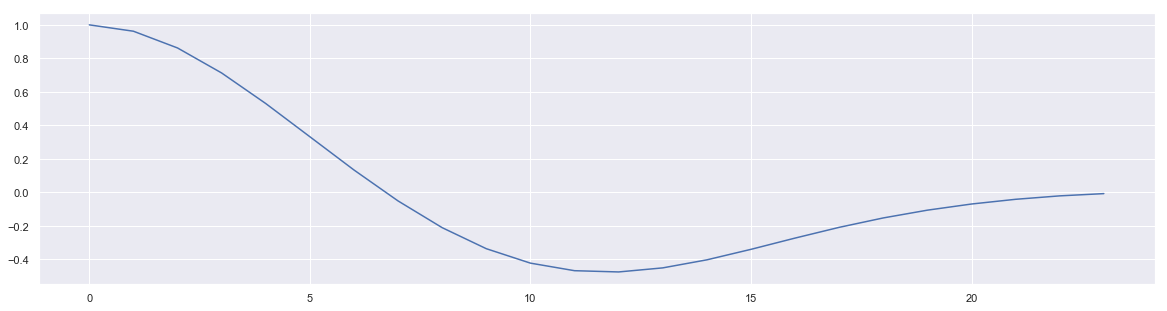

In [415]:
plt.plot(acf(b))

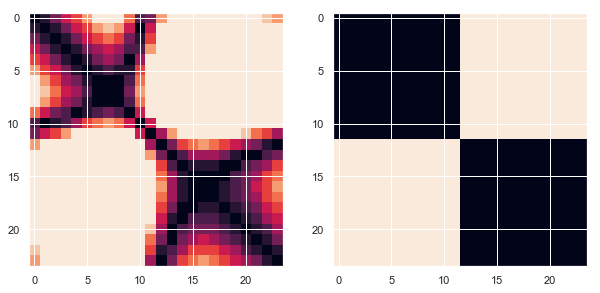

In [390]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(recurrence_plot(b.values, metric='euclidean'))
axs[1].imshow(recurrence_plot(b.values, metric='cosine'))

In [392]:
# or we can take the same hour, over a month

In [404]:
hourly = y[y.index.hour.isin((12,)) & y.index.month.isin((4,))]

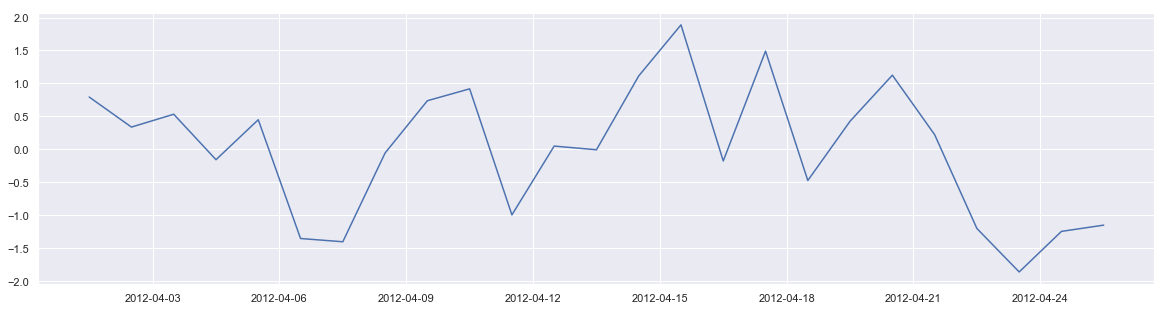

In [409]:
hourly = (hourly - hourly.mean())/hourly.std()
plt.plot(hourly)

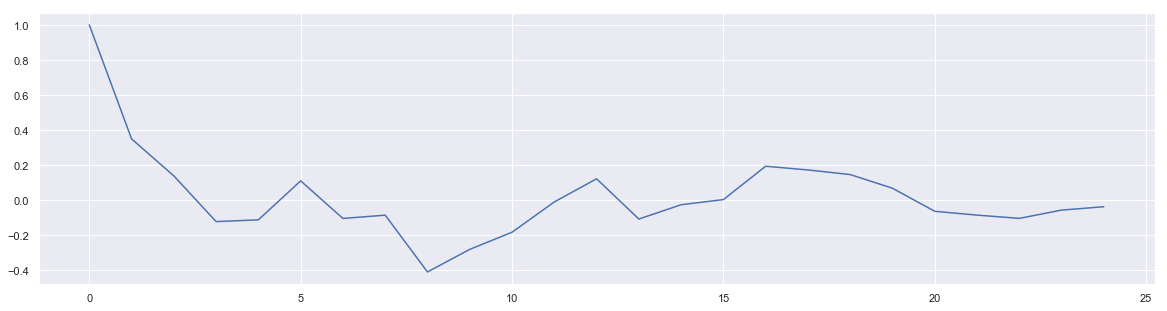

In [417]:
plt.plot(acf(hourly))

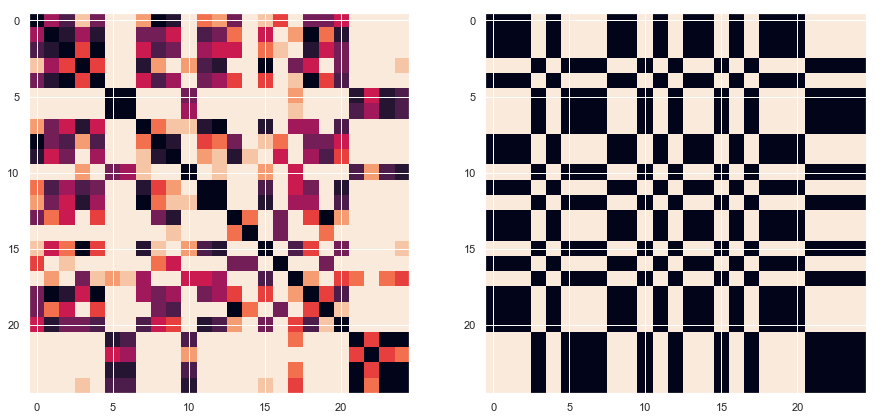

In [413]:
fig, axs = plt.subplots(1,2, figsize=(15,8))
axs[0].imshow(recurrence_plot(hourly.values, metric='euclidean'))
axs[1].imshow(recurrence_plot(hourly.values, metric='cosine'))

#### Losses

In [ ]:
# we can osberve how the different losses interact wrt to the estimates over time

In [ ]:
def smape(y, y_hat, eps=0.1):
    summ = np.maximum(np.abs(y) + np.abs(y_hat) + eps, 0.5 + eps)
    smape = 2. * np.abs(y_hat - y) / summ
    return smape  # tf.losses.compute_weighted_loss(smape, w, loss_collection=None)

In [436]:
y = hourly.values.flatten()
y_hat = y + np.random.normal(size=y.shape[0])

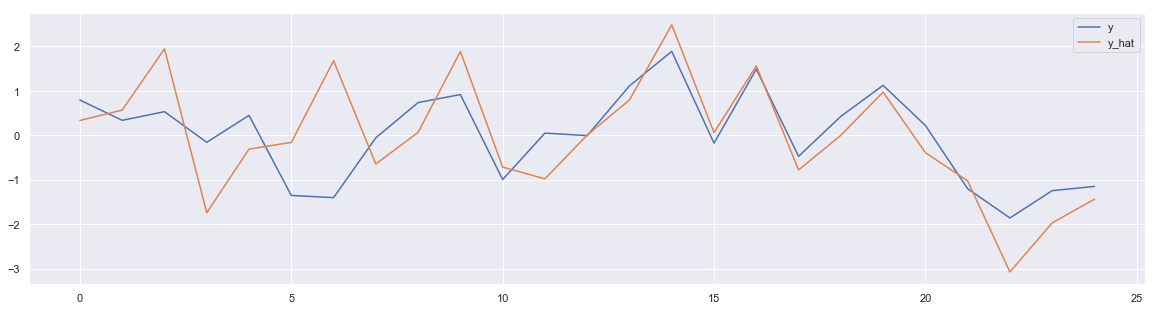

In [445]:
plt.plot(y)
plt.plot(y_hat)
plt.legend(['y','y_hat'])
plt.savefig('img/estimates.png')

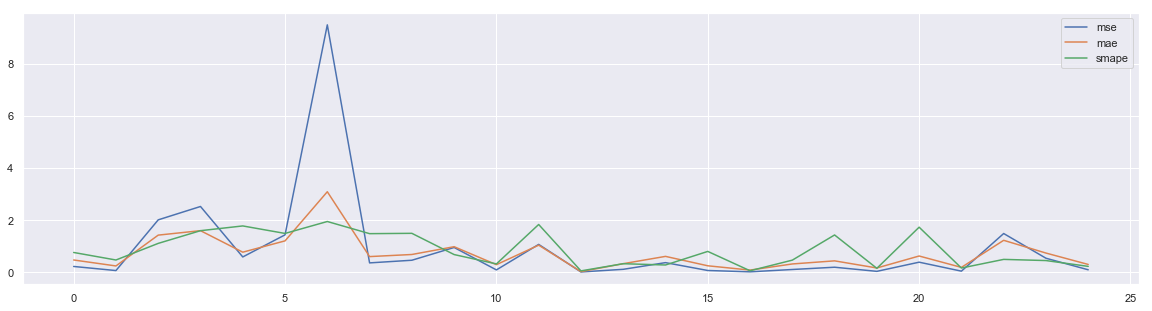

In [444]:
plt.plot((y - y_hat)**2)
plt.plot(abs(y - y_hat))
plt.plot(smape(y,y_hat))
plt.legend(['mse','mae','smape'])
plt.savefig('img/losses.png')